<a href="https://colab.research.google.com/github/sadiacse123/Index/blob/main/Copy_of_BASNet_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Clone source code from GitHub

In [1]:
!git clone https://github.com/NathanUA/BASNet.git

Cloning into 'BASNet'...
remote: Enumerating objects: 255, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 255 (delta 66), reused 57 (delta 57), pack-reused 182
Receiving objects: 100% (255/255), 3.60 MiB | 34.73 MiB/s, done.
Resolving deltas: 100% (126/126), done.


In [2]:
%cd BASNet

/content/BASNet


# 2.Download pre trained weight

In [3]:
!pip install gdown

In [4]:
import os
import gdown
os.makedirs('./saved_models/basnet_bsi', exist_ok=True)
gdown.download('https://drive.google.com/uc?id=1s52ek_4YTDRt_EOkx1FS53u-vJa0c4nu',
    './saved_models/basnet_bsi/basnet.pth',
    quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1s52ek_4YTDRt_EOkx1FS53u-vJa0c4nu
To: /content/BASNet/saved_models/basnet_bsi/basnet.pth
100%|██████████| 348M/348M [00:10<00:00, 33.6MB/s]


'./saved_models/basnet_bsi/basnet.pth'

In [ ]:
import cv2
import torch
from torchvision import transforms
from saved_models.basnet_bsi import BASNet

# Load pre-trained BASNet model
saved_models = BASNet()
saved_models.load_state_dict(torch.load('./saved_models/basnet_bsi/basnet.pth'))
saved_models.eval()

# Load and preprocess the input image
image_path = '/content/BASNet/test_data/test_images/0003.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
transform = transforms.Compose([transforms.ToPILImage(),
                                transforms.Resize((256, 256)),  # Resize to model's input size
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
input_tensor = transform(image).unsqueeze(0)

# Perform Forward Pass to get the saliency map
with torch.no_grad():
    output = model(input_tensor)

# Post-process the saliency map (if necessary)
saliency_map = output.squeeze().cpu().numpy()  # Convert tensor to numpy array

# You can further enhance the saliency map or create a binary mask using a thresholding technique
# e.g., thresholding:
threshold = 0.5  # Adjust the threshold value as needed
binary_mask = (saliency_map > threshold).astype(int)

# Visualize the results (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(saliency_map, cmap='gray')
plt.title('Saliency Map')
plt.show()


ImportError: ignored

# 3.Run basnet_test.py

In [5]:
!python basnet_test.py

...load BASNet...
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100% 83.3M/83.3M [00:00<00:00, 267MB/s]
inferencing: BKN06Z000006_W_big.jpg
inferencing: 0012.jpg
inferencing: 0005.jpg
inferencing: Cat03.jpg
inferencing: 0010.jpg
inferencing: 0003.jpg


# 4.Display a result

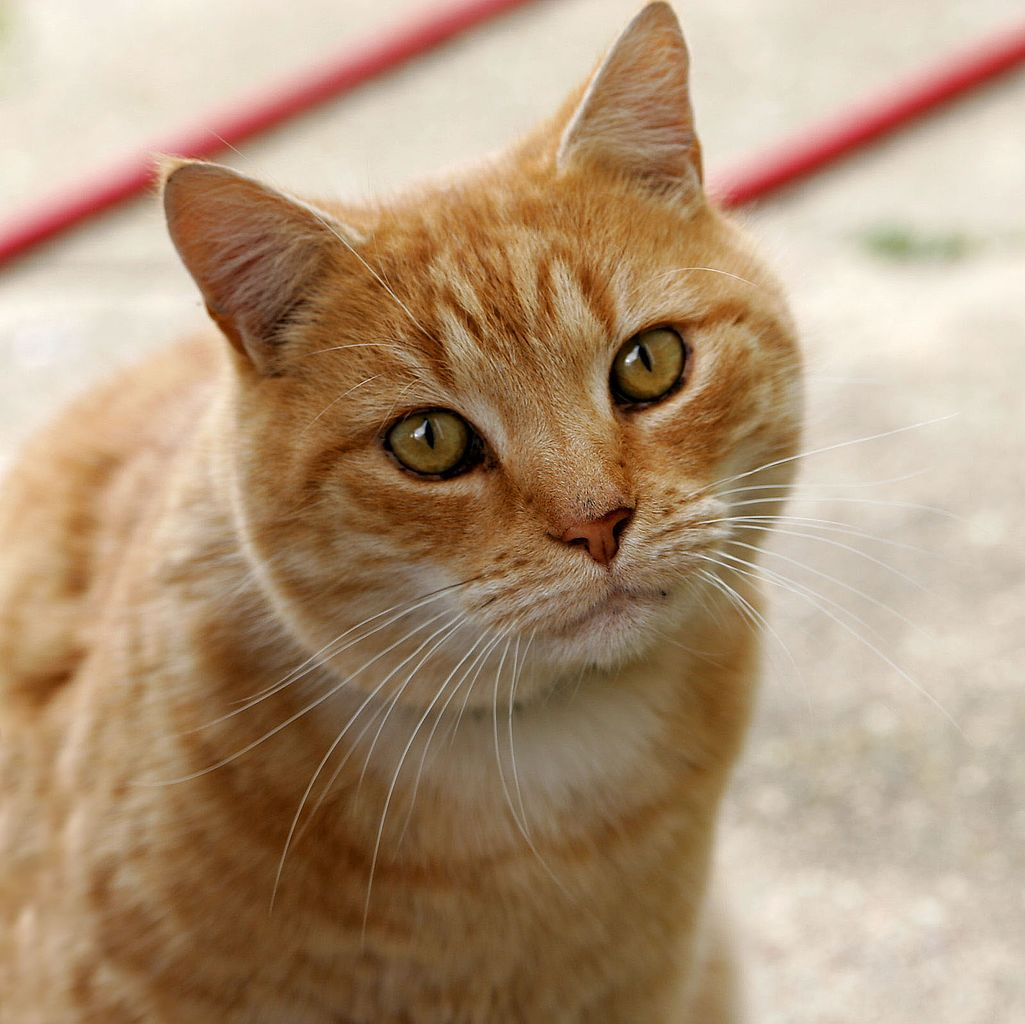

In [6]:
from PIL import Image
from IPython.display import display
img_input = Image.open('/content/BASNet/test_data/test_images/Cat03.jpg')
display(img_input)

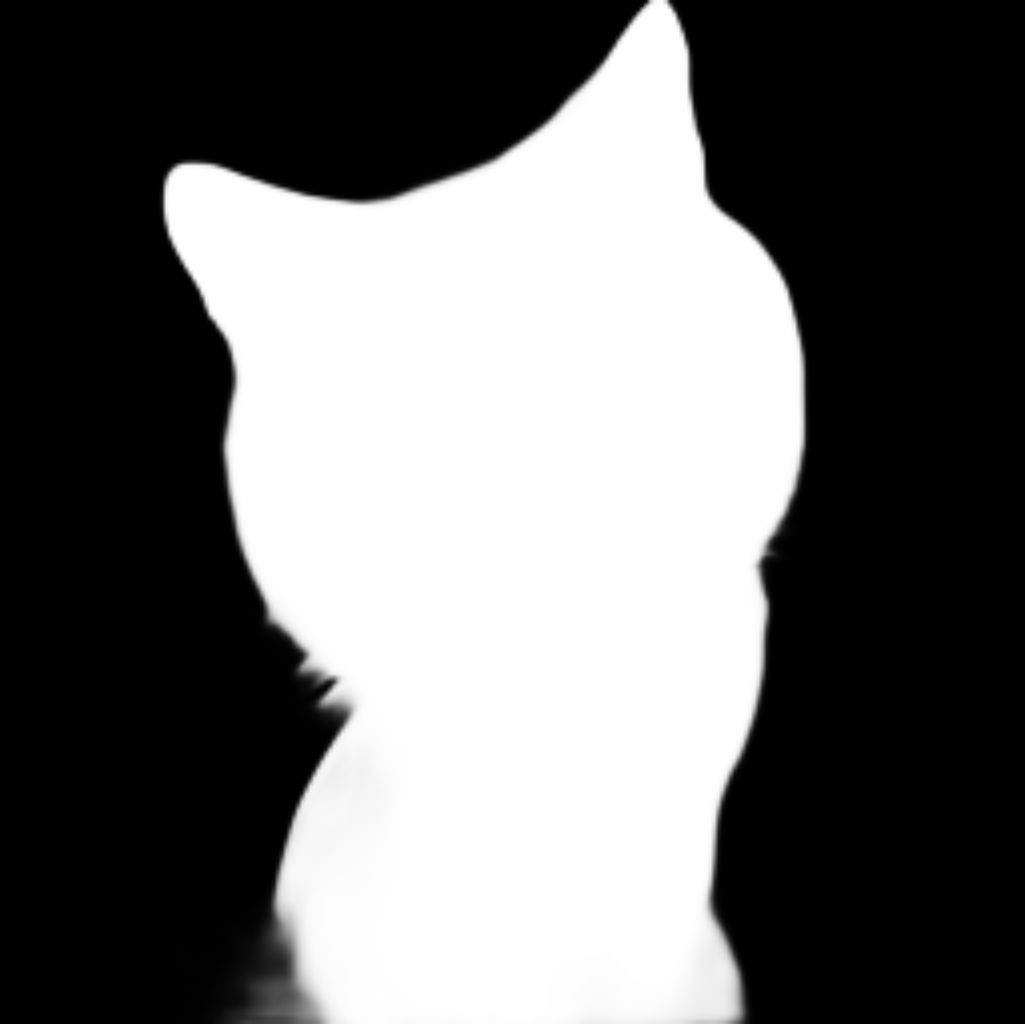

In [7]:
img_output = Image.open('/content/BASNet/test_data/test_results/Cat03.png')
display(img_output)